In [496]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from fancyimpute import KNN

ModuleNotFoundError: No module named 'fancyimpute'

In [450]:
df = pd.read_csv('births_toy.csv', index_col=[0])
#df = pd.read_csv('US_births(2018).csv')
col_dict = pd.read_excel('column_dictionary.xlsx', header=None)

In [451]:
df.shape

(1000, 55)

In [452]:
df.head()

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN
1,1,1,26.6,0,2570,12,2017,2.0,9,1426,...,0,0,1,110,1,2,N,0,M,64
2,1,1,24.1,0,3410,8,2017,1.0,5,915,...,0,0,1,224,1,2,N,0,M,45
3,1,1,28.8,0,2041,6,2018,2.0,7,636,...,0,0,0,153,1,1,N,0,F,36
4,1,1,31.6,0,4054,8,2018,2.0,1,642,...,0,1,0,155,1,2,N,0,M,0
5,1,1,34.4,0,3850,4,2017,1.0,5,2301,...,0,2,0,106,1,1,N,0,F,25


In [453]:
col_dict.head()

,0,1
0,ATTEND,birth_attendant
1,BFACIL,birth_place
2,BMI,bmi
3,CIG_0,cigs_before_preg
4,DBWT,birthweight_g


In [454]:
df.columns = col_dict[1]
df.columns = map(str.lower, df.columns)

In [455]:
df.describe()

,birth_attendant,birth_place,bmi,cigs_before_preg,birthweight_g,last_norm_menses_mn,last_norm_menses_yr,marital_stat,birth_mn,birth_time,...,mn_prenatalcare_began,num_prenatal_visits,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,delivery_method,res_status,num_prev_cesareans,weight_gain
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,872.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,1.298000,1.052000,28.845600,1.663000,3253.897000,9.582000,2256.671000,1.407110,6.211000,1229.50900,...,5.233000,13.331000,0.513000,1.446000,1.237000,178.508000,1.797000,1.355000,0.39500,31.88000
std,0.753501,0.411662,12.622755,8.429857,604.435574,16.602618,1362.271459,0.491578,3.453463,628.79395,...,14.792685,13.791797,6.987178,6.314662,8.830108,129.781166,1.148525,0.545227,4.45183,18.99696
min,1.000000,1.000000,15.300000,0.000000,540.000000,1.000000,2016.000000,1.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,1.000000,1.000000,0.00000,0.00000
25%,1.000000,1.000000,22.300000,0.000000,2973.750000,4.000000,2017.000000,1.000000,3.000000,802.75000,...,2.000000,9.000000,0.000000,0.000000,0.000000,130.000000,1.000000,1.000000,0.00000,20.00000
50%,1.000000,1.000000,25.800000,0.000000,3290.000000,7.000000,2017.000000,1.000000,6.000000,1231.00000,...,3.000000,12.000000,0.000000,1.000000,0.000000,150.000000,1.000000,1.000000,0.00000,29.50000
75%,1.000000,1.000000,31.225000,0.000000,3610.750000,10.000000,2017.000000,2.000000,9.000000,1721.25000,...,3.000000,14.000000,0.000000,2.000000,1.000000,185.000000,3.000000,2.000000,0.00000,40.00000
max,5.000000,7.000000,99.900000,99.000000,5240.000000,99.000000,9999.000000,2.000000,12.000000,2359.00000,...,99.000000,99.000000,99.000000,99.000000,99.000000,999.000000,5.000000,4.000000,99.00000,99.00000


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 55 columns):
birth_attendant          1000 non-null int64
birth_place              1000 non-null int64
bmi                      1000 non-null float64
cigs_before_preg         1000 non-null int64
birthweight_g            1000 non-null int64
last_norm_menses_mn      1000 non-null int64
last_norm_menses_yr      1000 non-null int64
marital_stat             872 non-null float64
birth_mn                 1000 non-null int64
birth_time               1000 non-null int64
birth_dy                 1000 non-null int64
birth_yr                 1000 non-null int64
m_deliveryweight         1000 non-null int64
f_age                    1000 non-null int64
f_education              1000 non-null int64
f_hispanic               1000 non-null int64
f_race15                 1000 non-null int64
f_race31                 1000 non-null int64
f_race6                  1000 non-null int64
last_live_birth_mn       1000 non-n

In [457]:
df = df.drop(['birth_yr', 
              'last_other_preg_mn', 
              'sex_imp', 
              'm_age_imp', 
              'm_marital_stat_imp', 
              'm_race_imp',
              'payment_det'], axis=1)

In [458]:
def replace_na(data, column_name, value):
    data[column_name] = data[column_name].mask(data[column_name] == value, np.nan)

In [459]:
replace_na(df, 'bmi', 99.9)
replace_na(df, 'm_nativity', 3)

In [460]:
columns_9 = ['birth_attendant','birth_place','f_education','f_hispanic','f_race6','m_education','m_hispanic',
             'infections','m_morbidity','riskf','delivery_method','payment']
              
for i in columns_9:
    replace_na(df, i, 9)

In [461]:
columns_99 = ['cigs_before_preg','last_norm_menses_mn','f_age','f_race15','f_race31','m_height_in',
             'mn_prenatalcare_began','num_prenatal_visits','prior_births_dead','prior_births_living',
             'prior_terminations','num_prev_cesareans','weight_gain']

for i in columns_99:
    replace_na(df, i, 99)

In [462]:
columns_888 = ['last_preg_mn','last_live_birth_mn']

for i in columns_888:
    replace_na(df, i, 888)

In [463]:
columns_999 = ['last_live_birth_mn','last_preg_mn','m_deliveryweight','prepreg_weight']

for i in columns_999:
    replace_na(df, i, 999)

In [464]:
columns_9999 = ['birthweight_g','last_norm_menses_yr','birth_time']

for i in columns_9999:
    replace_na(df, i, 9999)

In [465]:
columns_U = ['gonorrhea','labour_induced','admit_icu','m_transferred','prev_cesarean']

for i in columns_U:
    replace_na(df, i, 'U')

In [466]:
df['infections'] = df['infections'].mask(df['infections'] == 1, 'N')
df['infections'] = df['infections'].mask(df['infections'] == 0, 'Y')

df['m_morbidity'] = df['m_morbidity'].mask(df['m_morbidity'] == 1, 'N')
df['m_morbidity'] = df['m_morbidity'].mask(df['m_morbidity'] == 0, 'Y')

df['riskf'] = df['riskf'].mask(df['riskf'] == 1, 'N')
df['riskf'] = df['riskf'].mask(df['riskf'] == 0, 'Y')

In [467]:
df.head(10)

,birth_attendant,birth_place,bmi,cigs_before_preg,birthweight_g,last_norm_menses_mn,last_norm_menses_yr,marital_stat,birth_mn,birth_time,...,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,delivery_method,res_status,prev_cesarean,num_prev_cesareans,infant_sex,weight_gain
1,1,1,26.6,0.0,2570,12.0,2017.0,2.0,9,1426,...,0.0,0.0,1.0,110.0,1,2,N,0.0,M,64.0
2,1,1,24.1,0.0,3410,8.0,2017.0,1.0,5,915,...,0.0,0.0,1.0,224.0,1,2,N,0.0,M,45.0
3,1,1,28.8,0.0,2041,6.0,2018.0,2.0,7,636,...,0.0,0.0,0.0,153.0,1,1,N,0.0,F,36.0
4,1,1,31.6,0.0,4054,8.0,2018.0,2.0,1,642,...,0.0,1.0,0.0,155.0,1,2,N,0.0,M,0.0
5,1,1,34.4,0.0,3850,4.0,2017.0,1.0,5,2301,...,0.0,2.0,0.0,106.0,1,1,N,0.0,F,25.0
6,1,1,24.8,0.0,3450,10.0,2017.0,2.0,12,1606,...,0.0,0.0,0.0,172.0,3,1,N,0.0,M,15.0
7,3,1,45.3,10.0,3170,12.0,2017.0,2.0,7,2058,...,0.0,0.0,1.0,225.0,4,2,N,0.0,M,18.0
8,1,1,31.6,0.0,3845,4.0,2017.0,1.0,3,1626,...,0.0,1.0,0.0,146.0,3,2,N,1.0,F,19.0
9,1,1,35.0,0.0,3799,10.0,2018.0,1.0,11,2131,...,0.0,1.0,0.0,138.0,4,1,Y,0.0,F,19.0
10,1,1,30.9,0.0,3214,10.0,2017.0,NaN,7,1232,...,0.0,0.0,0.0,151.0,3,1,N,0.0,M,33.0


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 48 columns):
birth_attendant          1000 non-null int64
birth_place              1000 non-null int64
bmi                      978 non-null float64
cigs_before_preg         995 non-null float64
birthweight_g            1000 non-null int64
last_norm_menses_mn      968 non-null float64
last_norm_menses_yr      970 non-null float64
marital_stat             872 non-null float64
birth_mn                 1000 non-null int64
birth_time               1000 non-null int64
birth_dy                 1000 non-null int64
m_deliveryweight         976 non-null float64
f_age                    873 non-null float64
f_education              851 non-null float64
f_hispanic               856 non-null float64
f_race15                 818 non-null float64
f_race31                 818 non-null float64
f_race6                  818 non-null float64
last_live_birth_mn       578 non-null float64
last_preg_mn             

In [469]:
def convert_binary(data, col_name):
    data[col_name] = data[col_name].mask(data[col_name] == 'Y', 1)
    data[col_name] = data[col_name].mask(data[col_name] == 'N', 0)

cols = ['gonorrhea','labour_induced','admit_icu','m_transferred','infections','m_morbidity','prev_cesarean', 'riskf']

for i in cols:
    convert_binary(df, i)

In [470]:
df['infant_sex'] = df['infant_sex'].mask(df['infant_sex'] == 'M', 1)
df['infant_sex'] = df['infant_sex'].mask(df['infant_sex'] == 'F', 0)

In [471]:
#def convert_int(data, col_name):
 #   data[col_name] = data[col_name].astype(int)
    
#cols = ['gonorrhea','labour_induced','admit_icu','m_transferred','infections','m_morbidity','riskf','infant_sex']

#for i in cols:
 #   convert_int(df, i)

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 48 columns):
birth_attendant          1000 non-null int64
birth_place              1000 non-null int64
bmi                      978 non-null float64
cigs_before_preg         995 non-null float64
birthweight_g            1000 non-null int64
last_norm_menses_mn      968 non-null float64
last_norm_menses_yr      970 non-null float64
marital_stat             872 non-null float64
birth_mn                 1000 non-null int64
birth_time               1000 non-null int64
birth_dy                 1000 non-null int64
m_deliveryweight         976 non-null float64
f_age                    873 non-null float64
f_education              851 non-null float64
f_hispanic               856 non-null float64
f_race15                 818 non-null float64
f_race31                 818 non-null float64
f_race6                  818 non-null float64
last_live_birth_mn       578 non-null float64
last_preg_mn             

In [485]:
imputer = IterativeImputer(random_state=0)
df_imputed = np.round(pd.DataFrame(imputer.fit_transform(df)))

This gave impossible numerical values for categories - can i use np.round here?

In [486]:
df_colnames = df.columns
df_imputed.columns = df_colnames

In [487]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
birth_attendant          1000 non-null float64
birth_place              1000 non-null float64
bmi                      1000 non-null float64
cigs_before_preg         1000 non-null float64
birthweight_g            1000 non-null float64
last_norm_menses_mn      1000 non-null float64
last_norm_menses_yr      1000 non-null float64
marital_stat             1000 non-null float64
birth_mn                 1000 non-null float64
birth_time               1000 non-null float64
birth_dy                 1000 non-null float64
m_deliveryweight         1000 non-null float64
f_age                    1000 non-null float64
f_education              1000 non-null float64
f_hispanic               1000 non-null float64
f_race15                 1000 non-null float64
f_race31                 1000 non-null float64
f_race6                  1000 non-null float64
last_live_birth_mn       1000 non-null float64
l

* Looks like we can't do this?

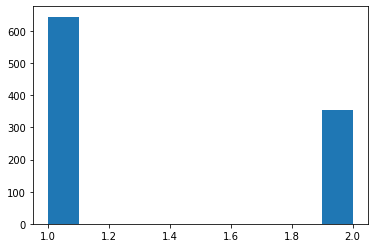

In [497]:
plt.hist(df_imputed['marital_stat'])
plt.show()

In [498]:
df_bin = pd.DataFrame.copy(df_imputed)
df_bin['birthweight_bin'] = np.where(df_bin['birthweight_g'] < 2500, 1, 0)

In [499]:
df_cat = pd.DataFrame.copy(df_bin)
df_cat['birthweight_cat'] = np.where(df_cat['birthweight_g'] < 1500, 2, df_cat['birthweight_bin'])

In [500]:
df_bin = df_bin.drop(['birthweight_g'], axis=1)
df_cat = df_cat.drop(['birthweight_g', 'birthweight_bin'], axis=1)

In [501]:
df_imputed.to_csv('Processed_data.csv')
df_bin.to_csv('Processed_data_bin.csv')
df_cat.to_csv('Processed_data_cat.csv')

* Trying KNN imputation to see if this is better for categorical numerical variables 

In [479]:
df_KNN = df.copy()

In [484]:
KNN_imputer = KNN()
df_KNN.iloc[:,:] = np.round(KNN_imputer.fit_transform(imputed))

NameError: name 'KNN' is not defined